$HW1$

Git hub link: https://github.com/13RENDA/EE399-HW1.git

Question i:

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

#Define data 
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

#Define the objective funtion
def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2)/31)
    return e2

#define function for calculating minimum error
def minError(y0,y1):
    return (np.min(np.abs(y0-y1)))

#define model
def myModel(cv, x):
    return (cv[0]*np.cos(cv[1]*x)+cv[2]*x+cv[3])

#Make a guess of coefficient
v0 = np.array([3, 1*np.pi/4, 2/3, 32])   # 3 pi/4 2/3 32

#perform optimization
res= opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')

#read coefficients
c = res.x

#calculate model result of input X
yfit1 = myModel(c, X)

# generate data for plotting
x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*np.cos(c[1]*x2)+c[2]*x2+c[3])

# plot the raw data and the fitted curve
plt.plot(X, Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Raw data and fitted curve')
plt.show()

#print out coefficients and the minimum error
print('The coefficients are: A =' + str(c[0])+', B ='+str(c[1])+', C ='+str(c[2])+', D ='+str(c[3]))
print('The minimum error is: ' + str(minError(yfit1,Y)))

: 

Question ii: Loss landscapes

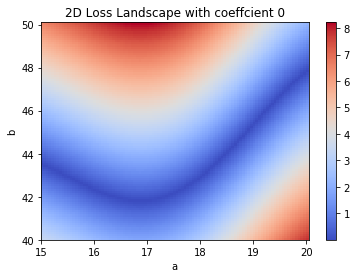

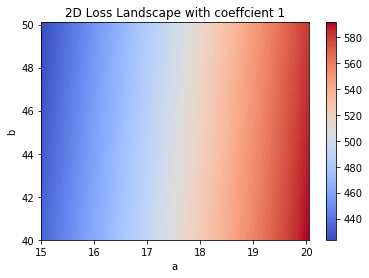

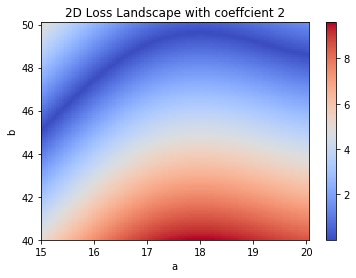

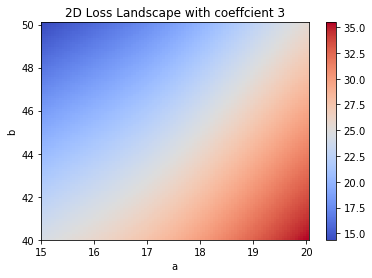

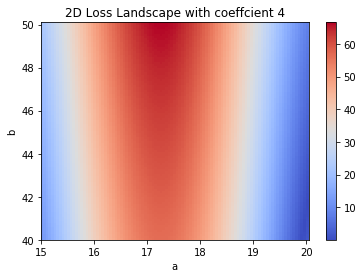

In [252]:
#sweeped coeffcients 
co = (  (c[0],c[1],c[2],c[3]),
        (c[0],c[1],c[3],c[2]),
        (c[0],c[2],c[1],c[3]),
        (c[2],c[1],c[0],c[3]),
        (c[3],c[1],c[2],c[0]) )

#Create a grid of x and y values
x3 = np.arange(15,20.05,0.05)
y3 = np.arange(40, 50.1, 0.1)
a, b = np.meshgrid(x3, y3)
losses = np.zeros((len(a),len(b)))

#define loss function
def loss(para1, para2):
    return (np.sqrt((para1-para2)**2))

#Generate loss lanscapes with different combination of coeffcients
for k in range (5):
    yPred = myModel(co[k],x3)
    for i in range (len(a)):
        for j in range (len(b)):
            losses[i,j] = loss(a[i][j],x3[j])+loss(b[i][j],yPred[j])

    # Create a 2D color plot of the loss landscape
    plt.pcolor(a, b, losses, cmap='coolwarm')
    plt.colorbar()
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('2D Loss Landscape with coeffcient '+ str(k))
    plt.show()

There are 1 minima for original coeffcients order and for coeffcient sets 1 to 3; and there are 2 minimas for the last set of coeffcients.

Question iii: Model training with first 20 data

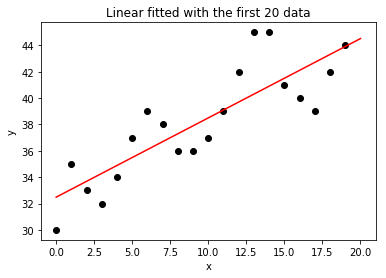

The least square error for linear model is: 3.5278140751274583


In [259]:
#define training data
x_20 = X[:20]
y_20 = Y[:20]

# c0 = np.array([0.5, 30])
#define the objective function
def velfit_l(c, x, y):    
    return (np.sqrt(np.sum(((c[0] * x) + c[1] - y)**2)/ 10))

# optimize fitting    
res= opt.minimize(velfit_l, c1, args=(x_20, y_20), method='Nelder-Mead')

# optimized coefficients
c1 = res.x

# generate data for plotting
x_linear = np.arange(0, 20.01, 0.01)
yfit = (c1[0]*x_linear+c1[1])


# plot the raw data and the fitted curve
plt.plot(x_20, y_20, 'ko')
plt.plot(x_linear, yfit, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear fitted with the first 20 data')
plt.show()

#define test data
x_last10 = X[20:]
y_last10 = Y[20:]

#calculate the least square of test data
el = velfit_l(c1, x_last10, y_last10)

print('The least square error for linear model is: ' + str(el))

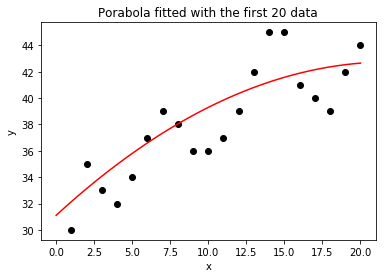

The least square error for porabola model is: 8.713651824310992


In [260]:
#define the objective function for parabola
def velfit_p(c, x, y):
    e2 = np.sqrt(np.sum(((c[0] * (x ** 2)) + c[1] * x + c[2] - y) ** 2) / len(x))
    return e2
    
# optimize fitting      
res= opt.minimize(velfit_p, c2, args=(x_20, y_20), method='Nelder-Mead')
c2 = res.x

# generate data for plotting
x_pora = np.arange(0, 20.01, 0.01)
yfit = (c2[0] * x_pora ** 2) + c2[1] * x_pora + c2[2]

# plot the raw data and the fitted curve
plt.plot(np.arange(1, 21), y_20, 'ko')
plt.plot(x_pora, yfit, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Porabola fitted with the first 20 data')
plt.show()


ep = velfi_p(c2,x_last10,y_last10)
print('The least square error for porabola model is: ' + str(ep))

/Users/brenda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


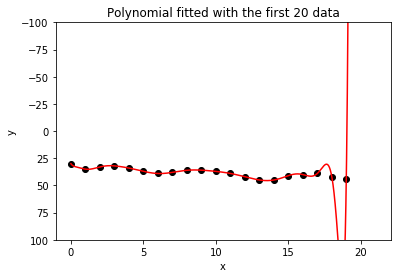

The least square error for polynomial model is: 28617752784.428474


In [261]:
#define the objective function for polynomial
def velfit_po(c, x, y):
    e2 = np.sqrt(np.sum((np.polyval(c,x) - y) ** 2) /len(x))
    return e2

#curve fitting  
c3 = np.polyfit(x_20,y_20,19)

# generate data for plotting
x_poly = np.arange(0, 21.01, 0.01)
yfit = np.polyval(c3,x_poly)

# plot the raw data and the fitted curve
plt.plot(x_20, y_20, 'ko')
plt.plot(x_poly, yfit, 'r-')
plt.ylim(100, -100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial fitted with the first 20 data')
plt.show()


epl = velfit_po(c3, x_last10, y_last10)
print('The least square error for polynomial model is: ' + str(epl))

Question iv: Model training with first and last 10 data

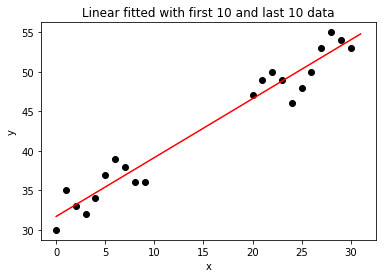

The least square error for new linear model is: 2.948750927000568, which is 0.5790631481268904 smaller than the result from question (iii)


In [269]:
#define new training data
x_side = np.concatenate((X[0:10],X[20:31]))
y_side = np.concatenate((Y[0:10],Y[20:31]))

#define new test data
x_c = X[10:20]
y_c = Y[10:20]

#make a initial guess
c4 = np.array([0.5, 30])

#Same action with new training and testing data
#optmize fitting    
res= opt.minimize(velfit_l, c4, args=(x_side, y_side), method='Nelder-Mead')

#optmized coefficients
c4 = res.x

# generate data for plotting
x_linear = np.arange(0, 31.01, 0.01)
yfit = (c4[0]*x_linear+c4[1])


# plot the raw data and the fitted curve
plt.plot(x_side, y_side, 'ko')
plt.plot(x_linear, yfit, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear fitted with first 10 and last 10 data')
plt.show()

#Calculate the least square error
el2 = velfit_l(c4, x_c, y_c)
print('The least square error for new linear model is: ' + str(el2) + ', which is ' + str(el-el2)+ ' smaller than the result from question (iii)')

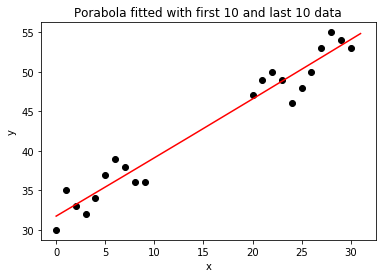

The least square error for new porabola model is: 2.935308118157717, which is 5.778343706153274 smaller than the result from question (iii)


In [271]:
#Make a initial guess
c5 = [-2, 1, 10]

#optmize fitting
res= opt.minimize(velfit_p, c5, args=(x_side, y_side), method='Nelder-Mead')

#fitted coeffcients
c5 = res.x

# generate data for plotting
x_pora = np.arange(0, 31.01, 0.01)
yfit = (c5[0] * x_pora ** 2) + c5[1] * x_pora + c5[2]

# plot the raw data and the fitted curve
plt.plot(x_side, y_side, 'ko')
plt.plot(x_pora, yfit, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Porabola fitted with first 10 and last 10 data')
plt.show()

#Calculate the least square error
ep2 = velfit_p(c5,x_c,y_c)
print('The least square error for new porabola model is: ' + str(ep2)+ ', which is ' + str(ep-ep2)+ ' smaller than the result from question (iii)')

/Users/brenda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


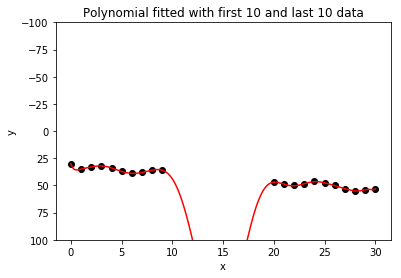

The least square error for new polynomial model is: 81.93347036362427, which is 28617752702.495003 smaller than the result from question (iii)


In [270]:

#curve fitting  
c6 = np.polyfit(x_side,y_side,19)

# generate data for plotting
x_poly = np.arange(0, 30.01, 0.01)
yfit = np.polyval(c6,x_poly)

# plot the raw data and the fitted curve
plt.plot(x_side, y_side, 'ko')
plt.plot(x_poly, yfit, 'r-')
plt.ylim(100, -100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial fitted with first 10 and last 10 data')
plt.show()

#Calculate the least square error
epl2 = velfit_po(c6, x_c, y_c)
print('The least square error for new polynomial model is: ' + str(epl2)+', which is ' + str(epl-epl2)+ ' smaller than the result from question (iii)')